In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving retail_transactions.csv to retail_transactions.csv


In [3]:
df = pd.read_csv("retail_transactions.csv")
df.head()

,OrderID,CustomerID,OrderDate,Country,ProductCategory,OrderValue
0,1,1051,2023-01-01,UK,Electronics,81
1,2,1092,2023-01-02,Ghana,Home Appliances,164
2,3,1014,2023-01-03,Kenya,Home Appliances,235
3,4,1071,2023-01-04,USA,Electronics,22
4,5,1060,2023-01-05,Nigeria,Sports,179


In [4]:
#UNDERSTAND THE DATA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   OrderID          500 non-null    int64 
 1   CustomerID       500 non-null    int64 
 2   OrderDate        500 non-null    object
 3   Country          500 non-null    object
 4   ProductCategory  500 non-null    object
 5   OrderValue       500 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 23.6+ KB


In [5]:
df.isna().sum()

,0
OrderID,0
CustomerID,0
OrderDate,0
Country,0
ProductCategory,0
OrderValue,0


In [6]:
#DATA HANDLING
df["OrderDate"] = pd.to_datetime(df["OrderDate"])
df["month"] = df["OrderDate"].dt.month
df["year"] = df["OrderDate"].dt.year


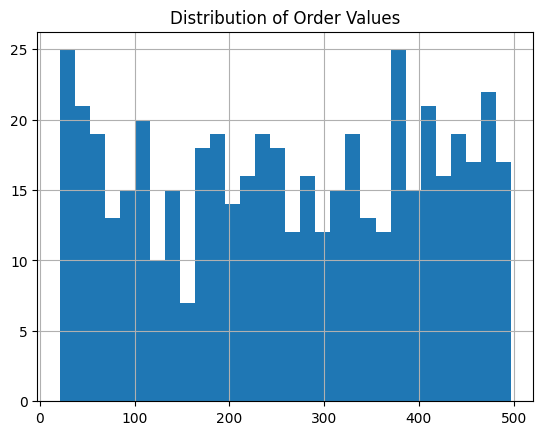

In [7]:
#Revenue distribution
df["OrderValue"].hist(bins=30)
plt.title("Distribution of Order Values")
plt.show()

In [8]:
#Revenue by country
df.groupby("Country")["OrderValue"].sum().sort_values(ascending=False)

,OrderValue
Country,
USA,27944
Ghana,27607
UK,26366
Nigeria,25706
Kenya,23060


In [9]:
#Revenue by product category
df.groupby("ProductCategory")["OrderValue"].sum().sort_values(ascending=False)

,OrderValue
ProductCategory,
Sports,30194
Home Appliances,26361
Electronics,26359
Clothing,25223
Beauty,22546


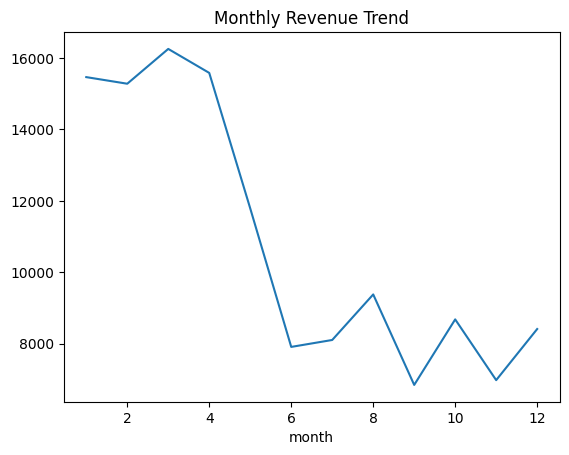

In [10]:
#Monthly revenue trend
df.groupby("month")["OrderValue"].sum().plot(kind="line")
plt.title("Monthly Revenue Trend")
plt.show()

In [11]:
#CUSTOMER-LEVEL FEATURES
customer_df = df.groupby("CustomerID").agg(
    total_orders=("OrderID", "count"),
    total_spend=("OrderValue", "sum"),
    avg_order_value=("OrderValue", "mean")
).reset_index()

In [12]:
#SEGMENT CUSTOMERS
customer_df["Segment"] = pd.qcut(
    customer_df["total_spend"],
    q=3,
    labels=["Low Value", "Medium Value", "High Value"]
)